<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Аугментация-данных-c-помощью-ImageDataGenerator" data-toc-modified-id="Аугментация-данных-c-помощью-ImageDataGenerator-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Аугментация данных c помощью ImageDataGenerator</a></span></li><li><span><a href="#Аугментация-данных-c-помощью-ImageDataGenerator" data-toc-modified-id="Аугментация-данных-c-помощью-ImageDataGenerator-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Аугментация данных c помощью ImageDataGenerator</a></span></li><li><span><a href="#Краткие-выводы-по-работе-с-аугментацией" data-toc-modified-id="Краткие-выводы-по-работе-с-аугментацией-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Краткие выводы по работе с аугментацией</a></span></li></ul></li><li><span><a href="#Выбор-базовой-модели-для-решения" data-toc-modified-id="Выбор-базовой-модели-для-решения-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Выбор базовой модели для решения</a></span><ul class="toc-item"><li><span><a href="#Xception" data-toc-modified-id="Xception-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Xception</a></span></li><li><span><a href="#Efficientnet" data-toc-modified-id="Efficientnet-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Efficientnet</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Эксперименты-с-базовой-моделью-Efficientnet" data-toc-modified-id="Эксперименты-с-базовой-моделью-Efficientnet-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Эксперименты с базовой моделью Efficientnet</a></span><ul class="toc-item"><li><span><a href="#Efficientnet-с-дополнительным-dense---слоем-на-выходе" data-toc-modified-id="Efficientnet-с-дополнительным-dense---слоем-на-выходе-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Efficientnet с дополнительным dense - слоем на выходе</a></span></li><li><span><a href="#Efficientnet-+-butch_normalization" data-toc-modified-id="Efficientnet-+-butch_normalization-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Efficientnet + butch_normalization</a></span></li><li><span><a href="#Efficientnet-c-ReduceLRonPlateau" data-toc-modified-id="Efficientnet-c-ReduceLRonPlateau-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Efficientnet c ReduceLRonPlateau</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Transfer-Learning" data-toc-modified-id="Transfer-Learning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Transfer Learning</a></span><ul class="toc-item"><li><span><a href="#Шаг-1.-Обучение-верхних-слёв" data-toc-modified-id="Шаг-1.-Обучение-верхних-слёв-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Шаг 1. Обучение верхних слёв</a></span></li><li><span><a href="#Шаг-2.-Обучение-средних-слоёв" data-toc-modified-id="Шаг-2.-Обучение-средних-слоёв-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Шаг 2. Обучение средних слоёв</a></span></li><li><span><a href="#Шаг-3.-Дообучение-глубинных-слоёв" data-toc-modified-id="Шаг-3.-Дообучение-глубинных-слоёв-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Шаг 3. Дообучение глубинных слоёв</a></span></li></ul></li><li><span><a href="#Fine-tuning" data-toc-modified-id="Fine-tuning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fine-tuning</a></span></li><li><span><a href="#Итоговое-предсказание" data-toc-modified-id="Итоговое-предсказание-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоговое предсказание</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>


# Определяем модель авто по фотографии
*Автор: Скворцов Михаил*

*e-mail: m.b.skvortz@gmail.com*


In [2]:
!pip install  -q efficientnet
!pip install  -q git+https://github.com/mjkvaak/ImageDataAugmentor

# Подключение библиотек

In [3]:
import csv
import os
import pickle
import sys
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import seaborn as sns
from PIL import ImageFilter, ImageOps
#увеличим дефолтный размер графиков
from pylab import rcParams
from sklearn.model_selection import StratifiedKFold, train_test_split

import albumentations
import efficientnet.keras as efn
import tensorflow as tf
from ImageDataAugmentor.image_data_augmentor import *
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.callbacks import (Callback, EarlyStopping,
                                        LearningRateScheduler, ModelCheckpoint,
                                        ReduceLROnPlateau)
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

rcParams['figure.figsize'] = 10, 5

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

print(os.listdir("../input"))
print('Python       :', sys.version.split('\n')[0])
print('Numpy        :', np.__version__)
print('Tensorflow   :', tf.__version__)
print('Keras        :', tf.keras.__version__)

['train.zip', 'train.csv', 'test.zip', 'sample-submission.csv']
Python       : 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
Numpy        : 1.18.5
Tensorflow   : 2.3.0
Keras        : 2.4.0


In [4]:
!pip freeze > requirements.txt

# Основные настройки

In [5]:
EPOCHS               = 5  # эпох на обучение
BATCH_SIZE           = 8 # уменьшаем batch если сеть большая, иначе не влезет в память на GPU
LR                   = 1e-4
VAL_SPLIT            = 0.15 # сколько данных выделяем на тест = 15%

CLASS_NUM            = 10  # количество классов в нашей задаче
IMG_SIZE             = 224 # какого размера подаем изображения в сеть
IMG_CHANNELS         = 3   # у RGB 3 канала
input_shape          = (IMG_SIZE, IMG_SIZE, IMG_CHANNELS)

DATA_PATH = '../input/'
PATH = "../working/car/" # рабочая директория

In [6]:
# Устаналиваем конкретное значение random seed для воспроизводимости
os.makedirs(PATH, exist_ok=False)

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
PYTHONHASHSEED = 0

# Загрузка данных

In [7]:
train_df = pd.read_csv(DATA_PATH+"train.csv")
sample_submission = pd.read_csv(DATA_PATH+"sample-submission.csv")

In [8]:
print('Распаковываем картинки')
# Will unzip the files so that you can see them..
for data_zip in ['train.zip', 'test.zip']:
    with zipfile.ZipFile("../input/"+data_zip,"r") as z:
        z.extractall(PATH)
        
print(os.listdir(PATH))

Распаковываем картинки
['test_upload', 'train']


## Подготовка данных
В качестве библиотек для аугментации данных использовались ImageDataGenerator и Albuminations 

### Аугментация данных c помощью ImageDataGenerator

In [9]:
def basic_image_data_augmentor():
    """
    Функция для генерации изображений на основе базового набора на основе ImageDataGenerator
    
    """
    train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=VAL_SPLIT, # set validation split
    horizontal_flip=False)

    test_datagen = ImageDataGenerator(rescale=1. / 255)
    train_generator = train_datagen.flow_from_directory(
        PATH+'train/',      # директория где расположены папки с картинками
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=True, seed=RANDOM_SEED,
        subset='training')  # set as training data

    test_generator = train_datagen.flow_from_directory(
        PATH+'train/',
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=True, seed=RANDOM_SEED,
        subset='validation')  # set as validation data

    test_sub_generator = test_datagen.flow_from_dataframe(
        dataframe=sample_submission,
        directory=PATH+'test_upload/',
        x_col="Id",
        y_col=None,
        shuffle=False,
        class_mode=None,
        seed=RANDOM_SEED,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,)

    return train_generator, test_generator, test_sub_generator

### Аугментация данных c помощью ImageDataGenerator

In [10]:
def albumenations_augmentor():
    """
    Функция для генерации изображений на основе библиотеки Albuminations
    """
    AUGMENTATIONS = albumentations.Compose([
        albumentations.Transpose(),
        albumentations.Flip(),
        albumentations.HorizontalFlip(),
        albumentations.ShiftScaleRotate(
            shift_limit=0.0625, scale_limit=0.50, rotate_limit=10),
        albumentations.Blur(blur_limit=3),
        albumentations.OpticalDistortion(),
        albumentations.GridDistortion(),
        albumentations.HueSaturationValue(),
        albumentations.OneOf([
            albumentations.RandomBrightnessContrast(
                brightness_limit=0.3, contrast_limit=0.3),
            albumentations.RandomBrightnessContrast(
                brightness_limit=0.1, contrast_limit=0.1)
        ], p=1),
        albumentations.RGBShift(),
    ])

    train_datagen = ImageDataAugmentor(
        rescale=1./255,
        augment=AUGMENTATIONS,
        validation_split=VAL_SPLIT,
        preprocess_input=None)

    test_datagen = ImageDataAugmentor(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        PATH+'train/',      # директория где расположены папки с картинками
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=True, seed=RANDOM_SEED,
        subset='training')  # set as training data

    test_generator = train_datagen.flow_from_directory(
        PATH+'train/',
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=True, seed=RANDOM_SEED,
        subset='validation')  # set as validation data

    test_sub_generator = test_datagen.flow_from_dataframe(
        dataframe=sample_submission,
        directory=PATH+'test_upload/',
        x_col="Id",
        y_col=None,
        shuffle=False,
        class_mode=None,
        seed=RANDOM_SEED,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,)

    return train_generator, test_generator, test_sub_generator

In [11]:
train_generator, test_generator, test_sub_generator = basic_image_data_augmentor()

Found 13232 images belonging to 10 classes.
Found 2329 images belonging to 10 classes.
Found 6675 validated image filenames.


### Краткие выводы по работе с аугментацией
В ходе работы над проектом работа с подбором аугментаций вызвала наибольшие затруднения.  

- Попробованы две библиотеки: ImageDataGenerator и Albuminations
- Эксперименты ImageDataGenerator можно посмотреть в ноутбуке: https://colab.research.google.com/drive/1PmE_gxy96TkwsOxbSOpglKQ4qMECep_X?usp=sharing 
- Эксперименты с Albuminations: https://colab.research.google.com/drive/1AU3CSqwgHYOcDtLCjHWO_oj58bbQMfwN?usp=sharing
- В итоговом решении использовался набор аугментаций из базового решения поскольку на них были лучшие показатели метрик.
**В целом надо уделить больше времени и разобраться как с этим работать**



# Построение модели

In [26]:
def create_model(base_model, butch_normalization=False, add_dense_layer=False, lr=LR):
    """
    Функция строит модель на основе базовой
     :param base_model: Базовая модель
     :param butch_normalization: Добавить butch нормализацию
     :param add_dense_layer: Добавить еще один плотный слой
     :param LR: задать стартовое значение learning rate
     :reurn: итоговую модель
    """
    model = keras.Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D(),)
    model.add(Dense(256, activation='relu'))

    if butch_normalization == True:
        model.add(BatchNormalization())

    if add_dense_layer == True:
        model.add(Dropout(0.5))
        model.add(Dense(256, activation='relu'))

    model.add(Dropout(0.25))
    model.add(Dense(CLASS_NUM, activation='softmax'))
    model.compile(loss="categorical_crossentropy",
                  optimizer=optimizers.Adam(lr=lr), metrics=["accuracy"])
    return model

In [19]:
def drow_evaluation_graphs(history):
    """
    Функция рисует графики для оценки качества обучени
     :param history: параметры, отслеживаемые в процессе обучения
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [24]:
def train_model_evaluate(model, best_model_name='best_model.hdf5', num_epochs=EPOCHS, use_reduce_lr=False):
    """
    Функция обучает и оценивает качество обучения модели
     :param model: обучаема модель
     :param best_model_name: куда сохранять промежуточную модель
     :param num_epochs: количество эпох обучения
     :param use_reduce_lr: уменьшать learning_rate если нет прогресса в обучении
     :return: обученная модель
    """

    checkpoint = ModelCheckpoint(best_model_name , monitor = ['val_accuracy'] , verbose = 1  , mode = 'max')
    earlystop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=2, min_lr=1e-6)
    callbacks_list = [checkpoint, earlystop]
    
    if use_reduce_lr==True:
        callbacks_list.append(reduce_lr)
    
    history = model.fit_generator(
        train_generator,
        steps_per_epoch = len(train_generator),
        validation_data = test_generator, 
        validation_steps = len(test_generator),
        epochs = num_epochs,
        callbacks = callbacks_list
    )
    
    model.save('../working/curent_model_last.hdf5')
    model.load_weights(best_model_name)
    scores = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    drow_evaluation_graphs(history)
    return model

## Выбор базовой модели для решения
Были протестированы две модели: модель Xception из базового решения и Efficientnet. Последняя была выбрана по следующим соображениям:

- сеть содержит не очень большое количество параметров (см. https://paperswithcode.com/sota/image-classification-on-imagenet);
- входит в топ-10 сетей для классификации изображений.

### Xception

In [27]:
xception_model = Xception(weights='imagenet', include_top=False, input_shape = input_shape)
model_xcpt = create_model(xception_model)
model_xcpt.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 21,388,594
Trainable params: 21,334,066
Non-trainable params: 54,528
_________________________________________________________________


Epoch 1/5
1654/1654 [==============================] - ETA: 0s - loss: 0.7021 - accuracy: 0.7545
Epoch 00001: saving model to best_model.hdf5
1654/1654 [==============================] - 364s 220ms/step - loss: 0.7021 - accuracy: 0.7545 - val_loss: 0.2722 - val_accuracy: 0.8987
Epoch 2/5
1654/1654 [==============================] - ETA: 0s - loss: 0.2410 - accuracy: 0.9150
Epoch 00002: saving model to best_model.hdf5
1654/1654 [==============================] - 366s 221ms/step - loss: 0.2410 - accuracy: 0.9150 - val_loss: 0.2193 - val_accuracy: 0.9223
Epoch 3/5
1654/1654 [==============================] - ETA: 0s - loss: 0.1663 - accuracy: 0.9413
Epoch 00003: saving model to best_model.hdf5
1654/1654 [==============================] - 365s 221ms/step - loss: 0.1663 - accuracy: 0.9413 - val_loss: 0.2273 - val_accuracy: 0.9180
Epoch 4/5
1654/1654 [==============================] - ETA: 0s - loss: 0.1384 - accuracy: 0.9510
Epoch 00004: saving model to best_model.hdf5
1654/1654 [==========

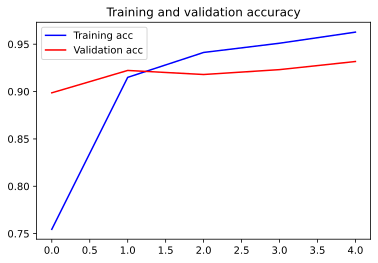

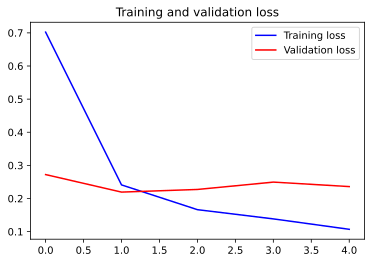

In [28]:
xception_model = train_model_evaluate(model_xcpt, 'best_model.hdf5', use_reduce_lr=True)

### Efficientnet

In [29]:
efficientnet_model = efn.EfficientNetB6(weights='imagenet', include_top=False, input_shape = input_shape)
model_efn = create_model(efficientnet_model)
model_efn.summary()

165527552/165527152 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b6 (Functional) (None, 7, 7, 2304)        40960136  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               590080    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 41,552,786
Trainable params: 41,328,354
Non-trainable params: 224,432
_________________________________________________________________


Epoch 1/5
1654/1654 [==============================] - ETA: 0s - loss: 0.8887 - accuracy: 0.6887
Epoch 00001: saving model to best_model.hdf5
1654/1654 [==============================] - 526s 318ms/step - loss: 0.8887 - accuracy: 0.6887 - val_loss: 0.2408 - val_accuracy: 0.9201
Epoch 2/5
1654/1654 [==============================] - ETA: 0s - loss: 0.3190 - accuracy: 0.8888
Epoch 00002: saving model to best_model.hdf5
1654/1654 [==============================] - 518s 313ms/step - loss: 0.3190 - accuracy: 0.8888 - val_loss: 0.1705 - val_accuracy: 0.9450
Epoch 3/5
1654/1654 [==============================] - ETA: 0s - loss: 0.2200 - accuracy: 0.9216
Epoch 00003: saving model to best_model.hdf5
1654/1654 [==============================] - 537s 324ms/step - loss: 0.2200 - accuracy: 0.9216 - val_loss: 0.1787 - val_accuracy: 0.9425
Epoch 4/5
1654/1654 [==============================] - ETA: 0s - loss: 0.1652 - accuracy: 0.9412
Epoch 00004: saving model to best_model.hdf5
1654/1654 [==========

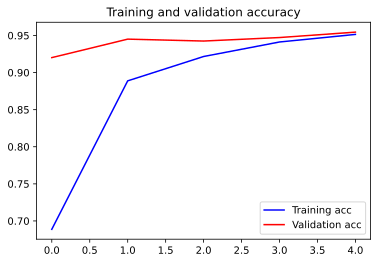

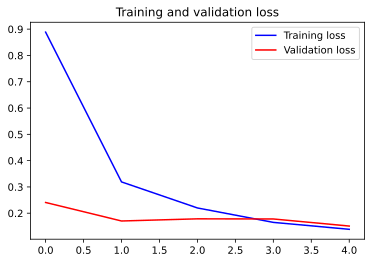

In [30]:
efficientnet_model = train_model_evaluate(model_efn, 'best_model.hdf5', use_reduce_lr=True)

### Промежуточные выводы
- Сеть EfficientNetB6 показывает лучший результат по сравнению с базовым решением;

##  Эксперименты с базовой моделью Efficientnet
### Efficientnet с дополнительным dense - слоем на выходе

In [31]:
efficientnet_model = efn.EfficientNetB6(weights='imagenet', include_top=False, input_shape = input_shape)
model_efn = create_model(efficientnet_model, add_dense_layer = True)
model_efn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b6 (Functional) (None, 7, 7, 2304)        40960136  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2304)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               590080    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

Epoch 1/5
1654/1654 [==============================] - ETA: 0s - loss: 1.1601 - accuracy: 0.5788
Epoch 00001: saving model to best_model.hdf5
1654/1654 [==============================] - 538s 326ms/step - loss: 1.1601 - accuracy: 0.5788 - val_loss: 0.2269 - val_accuracy: 0.9176
Epoch 2/5
1654/1654 [==============================] - ETA: 0s - loss: 0.4252 - accuracy: 0.8535
Epoch 00002: saving model to best_model.hdf5
1654/1654 [==============================] - 530s 320ms/step - loss: 0.4252 - accuracy: 0.8535 - val_loss: 0.1606 - val_accuracy: 0.9390
Epoch 3/5
1654/1654 [==============================] - ETA: 0s - loss: 0.2815 - accuracy: 0.9036
Epoch 00003: saving model to best_model.hdf5
1654/1654 [==============================] - 538s 325ms/step - loss: 0.2815 - accuracy: 0.9036 - val_loss: 0.1586 - val_accuracy: 0.9450
Epoch 4/5
1654/1654 [==============================] - ETA: 0s - loss: 0.2200 - accuracy: 0.9250
Epoch 00004: saving model to best_model.hdf5
1654/1654 [==========

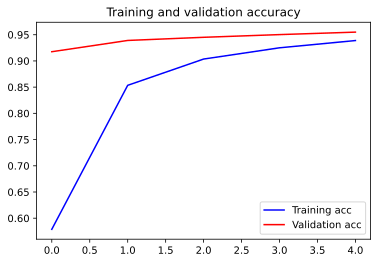

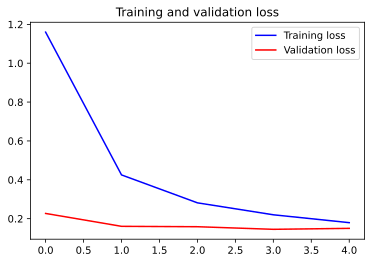

In [32]:
efficientnet_model = train_model_evaluate(model_efn, 'best_model.hdf5')

Сеть Efficientnet показывает более точный результат!

### Efficientnet + butch_normalization

In [33]:
efficientnet_model = efn.EfficientNetB6(
    weights='imagenet', include_top=False, input_shape=input_shape)
model_efn = create_model(efficientnet_model, butch_normalization=True)
model_efn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b6 (Functional) (None, 7, 7, 2304)        40960136  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2304)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               590080    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 41,553,810
Trainable params: 41,328,866
Non-trainable params: 224,944
____________________________________

Epoch 1/8
1654/1654 [==============================] - ETA: 0s - loss: 1.3249 - accuracy: 0.5640
Epoch 00001: saving model to best_model.hdf5
1654/1654 [==============================] - 518s 313ms/step - loss: 1.3249 - accuracy: 0.5640 - val_loss: 0.3476 - val_accuracy: 0.8789
Epoch 2/8
1654/1654 [==============================] - ETA: 0s - loss: 0.5368 - accuracy: 0.8199
Epoch 00002: saving model to best_model.hdf5
1654/1654 [==============================] - 513s 310ms/step - loss: 0.5368 - accuracy: 0.8199 - val_loss: 0.2220 - val_accuracy: 0.9206
Epoch 3/8
1654/1654 [==============================] - ETA: 0s - loss: 0.3702 - accuracy: 0.8767
Epoch 00003: saving model to best_model.hdf5
1654/1654 [==============================] - 511s 309ms/step - loss: 0.3702 - accuracy: 0.8767 - val_loss: 0.1933 - val_accuracy: 0.9420
Epoch 4/8
1654/1654 [==============================] - ETA: 0s - loss: 0.2770 - accuracy: 0.9066
Epoch 00004: saving model to best_model.hdf5
1654/1654 [==========

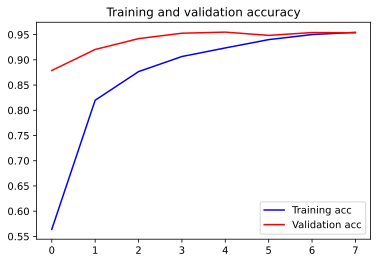

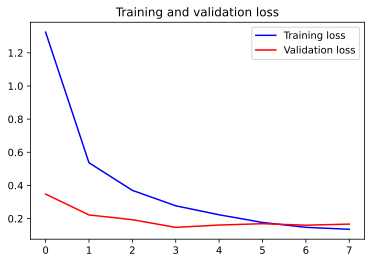

In [34]:
efficientnet_model = train_model_evaluate(
    model_efn, 'best_model.hdf5', num_epochs=8)

Добавление butch normalization не дало существенного прироста к модели

### Efficientnet c ReduceLRonPlateau

In [35]:
efficientnet_model = efn.EfficientNetB6(
    weights='imagenet', include_top=False, input_shape=input_shape)
model_efn = create_model(efficientnet_model)
model_efn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b6 (Functional) (None, 7, 7, 2304)        40960136  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2304)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               590080    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 41,552,786
Trainable params: 41,328,354
Non-trainable params: 224,432
_________________________________________________________________


Epoch 1/8
1654/1654 [==============================] - ETA: 0s - loss: 0.8873 - accuracy: 0.6849
Epoch 00001: saving model to best_model.hdf5
1654/1654 [==============================] - 519s 314ms/step - loss: 0.8873 - accuracy: 0.6849 - val_loss: 0.2294 - val_accuracy: 0.9176
Epoch 2/8
1654/1654 [==============================] - ETA: 0s - loss: 0.3186 - accuracy: 0.8878
Epoch 00002: saving model to best_model.hdf5
1654/1654 [==============================] - 514s 310ms/step - loss: 0.3186 - accuracy: 0.8878 - val_loss: 0.1590 - val_accuracy: 0.9463
Epoch 3/8
1654/1654 [==============================] - ETA: 0s - loss: 0.2070 - accuracy: 0.9290
Epoch 00003: saving model to best_model.hdf5
1654/1654 [==============================] - 520s 314ms/step - loss: 0.2070 - accuracy: 0.9290 - val_loss: 0.1660 - val_accuracy: 0.9489
Epoch 4/8
1654/1654 [==============================] - ETA: 0s - loss: 0.1639 - accuracy: 0.9414
Epoch 00004: saving model to best_model.hdf5
1654/1654 [==========

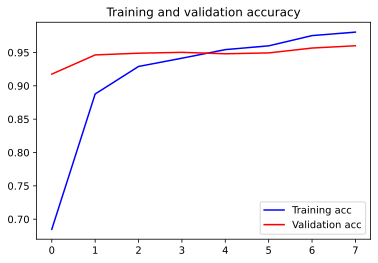

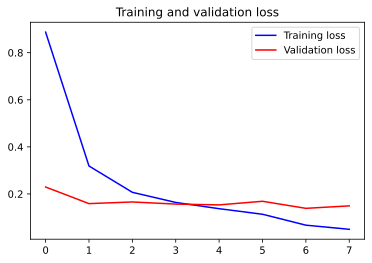

In [36]:
efficientnet_model = train_model_evaluate(model_efn, 'best_model.hdf5', num_epochs=8,
                                          use_reduce_lr=True
                                          )

### Промежуточные выводы
- Наилучший результат показывает модификация алгоритма с использование дополнительного callback ReduceLRonPlateau (уменьшение learning rate если несколько эпох подряд нет улучшения метрик).
- Также были эксперименты с использованием LR Scheduler, но прирост оказался не такой существенный в сравнении с ReduceLRonPlateau https://www.kaggle.com/mikhailskvortsov/sf-rds6-skvortsov-dst8-car-classification?scriptVersionId=43218628.

## Transfer Learning
### Шаг 1. Обучение верхних слёв

In [12]:
base_model = efn.EfficientNetB6(
    weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False

165527552/165527152 [==============================] - 4s 0us/step


In [13]:
model = keras.Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D(),)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(CLASS_NUM, activation='softmax'))

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b6 (Functional) (None, 7, 7, 2304)        40960136  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               590080    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [15]:
LR = 1e-3
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(lr=LR), metrics=["accuracy"])
checkpoint = ModelCheckpoint('best_model.hdf5', monitor=[
                             'val_accuracy'], verbose=1, mode='max')
earlystop = EarlyStopping(monitor='val_accuracy',
                          patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.3, patience=2, min_lr=1e-6)
callbacks_list = [checkpoint, earlystop, reduce_lr]

In [16]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples//test_generator.batch_size,
    epochs=7,
    callbacks=callbacks_list
)

Epoch 1/7
1654/1654 [==============================] - ETA: 0s - loss: 1.9577 - accuracy: 0.2845
Epoch 00001: saving model to best_model.hdf5
1654/1654 [==============================] - 309s 187ms/step - loss: 1.9577 - accuracy: 0.2845 - val_loss: 1.4816 - val_accuracy: 0.4485
Epoch 2/7
1654/1654 [==============================] - ETA: 0s - loss: 1.7824 - accuracy: 0.3458
Epoch 00002: saving model to best_model.hdf5
1654/1654 [==============================] - 289s 175ms/step - loss: 1.7824 - accuracy: 0.3458 - val_loss: 1.3646 - val_accuracy: 0.4979
Epoch 3/7
1654/1654 [==============================] - ETA: 0s - loss: 1.7149 - accuracy: 0.3677
Epoch 00003: saving model to best_model.hdf5
1654/1654 [==============================] - 288s 174ms/step - loss: 1.7149 - accuracy: 0.3677 - val_loss: 1.3148 - val_accuracy: 0.5266
Epoch 4/7
1654/1654 [==============================] - ETA: 0s - loss: 1.6716 - accuracy: 0.3875
Epoch 00004: saving model to best_model.hdf5
1654/1654 [==========

In [17]:
model.save('../working/curent_model_last.hdf5')
model.load_weights('best_model.hdf5')
scores = model.evaluate_generator(
    test_generator, steps=len(test_generator), verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

292/292 [==============================] - 46s 157ms/step - loss: 1.2267 - accuracy: 0.5646
Accuracy: 56.46%


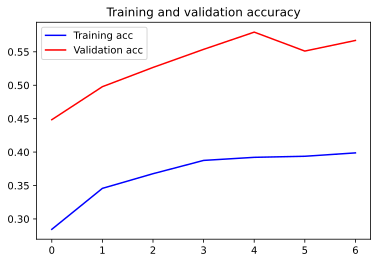

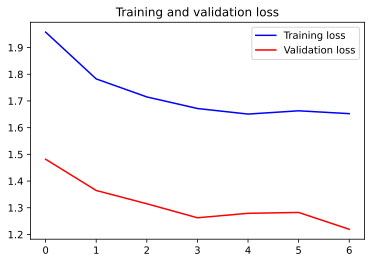

In [20]:
drow_evaluation_graphs(history)

### Шаг 2. Обучение средних слоёв

In [21]:
base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = len(base_model.layers)//2

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

In [22]:
# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.functional.Functional object at 0x7fae08401450> True
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7fae08342190> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fadf06a80d0> True
<tensorflow.python.keras.layers.core.Dropout object at 0x7fadf06a8190> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fadf06cb950> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fadf06cba10> True
<tensorflow.python.keras.layers.core.Dropout object at 0x7fadf066c550> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fadf0678390> True


In [23]:
LR=1e-4
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=LR), metrics=["accuracy"])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b6 (Functional) (None, 7, 7, 2304)        40960136  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               590080    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [25]:
for layer in model.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.functional.Functional object at 0x7fae08401450> True
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7fae08342190> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fadf06a80d0> True
<tensorflow.python.keras.layers.core.Dropout object at 0x7fadf06a8190> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fadf06cb950> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fadf06cba10> True
<tensorflow.python.keras.layers.core.Dropout object at 0x7fadf066c550> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fadf0678390> True


In [26]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch = train_generator.samples//train_generator.batch_size,
        validation_data = test_generator, 
        validation_steps = test_generator.samples//test_generator.batch_size,
        epochs = 10,
        callbacks = callbacks_list
)

Epoch 1/10
1654/1654 [==============================] - ETA: 0s - loss: 1.6420 - accuracy: 0.4247
Epoch 00001: saving model to best_model.hdf5
1654/1654 [==============================] - 355s 215ms/step - loss: 1.6420 - accuracy: 0.4247 - val_loss: 0.8606 - val_accuracy: 0.6972
Epoch 2/10
1654/1654 [==============================] - ETA: 0s - loss: 1.1707 - accuracy: 0.5777
Epoch 00002: saving model to best_model.hdf5
1654/1654 [==============================] - 352s 213ms/step - loss: 1.1707 - accuracy: 0.5777 - val_loss: 0.6135 - val_accuracy: 0.7882
Epoch 3/10
1654/1654 [==============================] - ETA: 0s - loss: 0.9738 - accuracy: 0.6555
Epoch 00003: saving model to best_model.hdf5
1654/1654 [==============================] - 349s 211ms/step - loss: 0.9738 - accuracy: 0.6555 - val_loss: 0.4686 - val_accuracy: 0.8243
Epoch 4/10
1654/1654 [==============================] - ETA: 0s - loss: 0.8314 - accuracy: 0.7078
Epoch 00004: saving model to best_model.hdf5
1654/1654 [======

In [27]:
model.save('../working/curent_model_last.hdf5')
model.load_weights('best_model.hdf5')
scores = model.evaluate_generator(
    test_generator, steps=len(test_generator), verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

292/292 [==============================] - 42s 144ms/step - loss: 0.2404 - accuracy: 0.9249
Accuracy: 92.49%


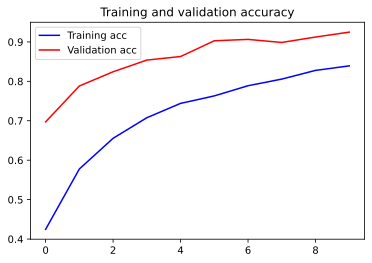

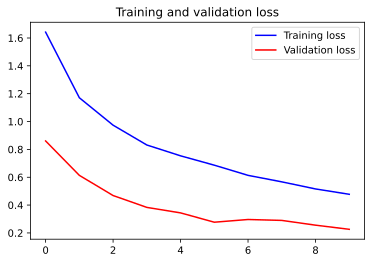

In [28]:
drow_evaluation_graphs(history)

### Шаг 3. Дообучение глубинных слоёв

In [29]:
base_model.trainable = True

In [30]:
LR=1e-5
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=LR), metrics=["accuracy"])

In [31]:
# Обучаем
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples//test_generator.batch_size,
    epochs=10,
    callbacks=callbacks_list
)

Epoch 1/10
1654/1654 [==============================] - ETA: 0s - loss: 0.4221 - accuracy: 0.8580
Epoch 00001: saving model to best_model.hdf5
1654/1654 [==============================] - 507s 307ms/step - loss: 0.4221 - accuracy: 0.8580 - val_loss: 0.1881 - val_accuracy: 0.9351
Epoch 2/10
1654/1654 [==============================] - ETA: 0s - loss: 0.3730 - accuracy: 0.8723
Epoch 00002: saving model to best_model.hdf5
1654/1654 [==============================] - 504s 305ms/step - loss: 0.3730 - accuracy: 0.8723 - val_loss: 0.1789 - val_accuracy: 0.9420
Epoch 3/10
1654/1654 [==============================] - ETA: 0s - loss: 0.3519 - accuracy: 0.8800
Epoch 00003: saving model to best_model.hdf5
1654/1654 [==============================] - 500s 302ms/step - loss: 0.3519 - accuracy: 0.8800 - val_loss: 0.1753 - val_accuracy: 0.9377
Epoch 4/10
1654/1654 [==============================] - ETA: 0s - loss: 0.3315 - accuracy: 0.8878
Epoch 00004: saving model to best_model.hdf5
1654/1654 [======

In [32]:
model.save('../working/curent_model_last.hdf5')
model.load_weights('best_model.hdf5')
scores = model.evaluate_generator(
    test_generator, steps=len(test_generator), verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

292/292 [==============================] - 42s 143ms/step - loss: 0.1619 - accuracy: 0.9442
Accuracy: 94.42%


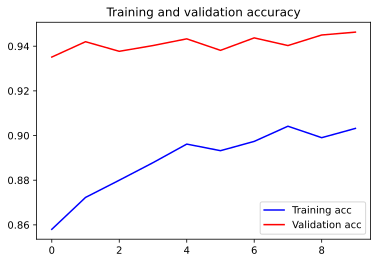

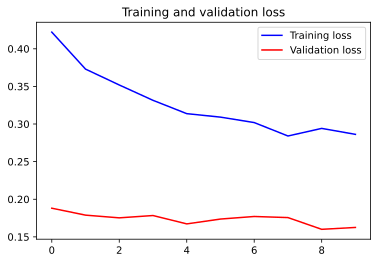

In [33]:
drow_evaluation_graphs(history)

## Fine-tuning

In [34]:
EPOCHS = 5
BATCH_SIZE = 4  # уменьшаем batch если сеть большая, иначе не влезет в память на GPU
LR = 1e-5

IMG_SIZE = 512
IMG_CHANNELS = 3
input_shape = (IMG_SIZE, IMG_SIZE, IMG_CHANNELS)

In [35]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=20,
                                   # shear_range=0.2,
                                   zoom_range=[0.75, 1.25],
                                   validation_split=VAL_SPLIT,
                                   #brightness_range=[0.5, 1.5],
                                   # width_shift_range=0.1,
                                   # height_shift_range=0.1,
                                   horizontal_flip=False)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [36]:
train_generator = train_datagen.flow_from_directory(
    PATH+'train/',      # директория где расположены папки с картинками
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True, seed=RANDOM_SEED,
    subset='training')  # set as training data

test_generator = train_datagen.flow_from_directory(
    PATH+'train/',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True, seed=RANDOM_SEED,
    subset='validation')  # set as validation data

Found 13232 images belonging to 10 classes.
Found 2329 images belonging to 10 classes.


In [37]:
base_model = efn.EfficientNetB6(
    weights='imagenet', include_top=False, input_shape=input_shape)

In [38]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(lr=LR), metrics=["accuracy"])

In [39]:
model.load_weights('best_model.hdf5')

In [40]:
# Обучаем
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples//test_generator.batch_size,
    epochs=EPOCHS,
    callbacks=callbacks_list
)

Epoch 1/5
3308/3308 [==============================] - ETA: 0s - loss: 0.9172 - accuracy: 0.6981
Epoch 00001: saving model to best_model.hdf5
3308/3308 [==============================] - 2314s 699ms/step - loss: 0.9172 - accuracy: 0.6981 - val_loss: 0.2211 - val_accuracy: 0.9364
Epoch 2/5
3308/3308 [==============================] - ETA: 0s - loss: 0.6530 - accuracy: 0.7801
Epoch 00002: saving model to best_model.hdf5
3308/3308 [==============================] - 2305s 697ms/step - loss: 0.6530 - accuracy: 0.7801 - val_loss: 0.1901 - val_accuracy: 0.9450
Epoch 3/5
3308/3308 [==============================] - ETA: 0s - loss: 0.5730 - accuracy: 0.8132
Epoch 00003: saving model to best_model.hdf5
3308/3308 [==============================] - 2296s 694ms/step - loss: 0.5730 - accuracy: 0.8132 - val_loss: 0.1704 - val_accuracy: 0.9463
Epoch 4/5
3308/3308 [==============================] - ETA: 0s - loss: 0.5032 - accuracy: 0.8390
Epoch 00004: saving model to best_model.hdf5
3308/3308 [=======

In [41]:
model.save('../working/curent_model_last.hdf5')
model.load_weights('best_model.hdf5')
scores = model.evaluate_generator(
    test_generator, steps=len(test_generator), verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

583/583 [==============================] - 165s 283ms/step - loss: 0.1579 - accuracy: 0.9528
Accuracy: 95.28%


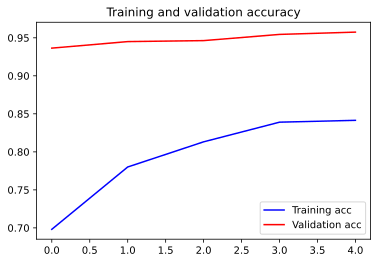

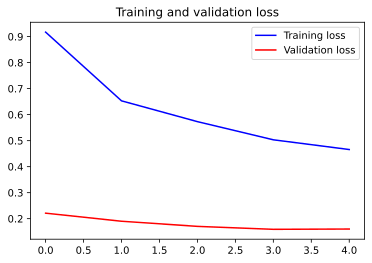

In [42]:
drow_evaluation_graphs(history)

## Итоговое предсказание

In [43]:
test_sub_generator.samples

6675

In [44]:
test_sub_generator.reset()
predictions = model.predict_generator(test_sub_generator, steps=len(test_sub_generator), verbose=1) 
predictions = np.argmax(predictions, axis=-1) #multiple categories
label_map = (train_generator.class_indices)
label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
predictions = [label_map[k] for k in predictions]


835/835 [==============================] - 52s 62ms/step


In [45]:
filenames_with_dir=test_sub_generator.filenames
submission = pd.DataFrame({'Id':filenames_with_dir, 'Category':predictions}, columns=['Id', 'Category'])
submission['Id'] = submission['Id'].replace('test_upload/','')
submission.to_csv('efficientb6_LR_reduce_submission.csv', index=False)
print('Save submit')

Save submit


In [46]:
submission.head()

,Id,Category
0,305108.jpg,7
1,295075.jpg,6
2,31197.jpg,4
3,93598.jpg,9
4,87877.jpg,9


## Выводы


Ниже в таблице приведены результаты показанные разными моделями.

| Алгоритм                                                     | Точность |
| ------------------------------------------------------------ | -------- |
| Базовый алгоритм Xception                                    | 90.73%   |
| Базовый алгоритм Xception с ReduceLRonPlateau                | 93.13%   |
| Базовый алгоритм Efficientnet без модификаций                | 95.28%   |
| Efficientnet с дополнительным dense - слоем на выходе        | 95.45%   |
| Efficientnet + butch_normalization                           | 95.62%   |
| Efficientnet c ReduceLRonPlateau                             | 96.09%   |
| Efficientnet + butch_normalization+ReduceLRonPlateau+transfer learning | 94.42%   |
| Efficientnet + fine tuning                                   | 95.28%   |

- Как ни странно лучший результат показала модель  Efficientnet c ReduceLRonPlateau, а не fine tuning как ожидалось. Возможно в реализации где-то ошибка.
- Итоговое 29 - место (по состоянию на 03.10.2020.
- Понятны напраления для улучшения модели: подобрать более качественные аугментации и подобрать более хорошие параметры для fine tuning
